# Assignment 1 - Artificial Intelligence techniques

Take three images of a hand in each of the three lighting conditions (indoor, outdoor and shadow). Use `cvCalcHist()` to make an RGB histogram of the flesh color of one of the hands photographed indoors.

Firstly, load the libraries.

In [20]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)

OpenCV version: 4.6.0


Load the images.

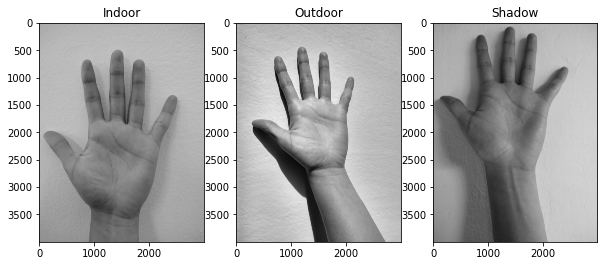

In [21]:
# Code for use the notebook from google colab
# from google.colab import drive
# drive.mount('/content/gdrive')

# %cd /content/gdrive/.shortcut-targets-by-id/<folder-id>


indoor = cv2.imread('Img\indoor.jpg', cv2.IMREAD_GRAYSCALE)
outdoor = cv2.imread('Img\outdoor.jpg', cv2.IMREAD_GRAYSCALE)
shadow = cv2.imread('Img\shadow.jpg', cv2.IMREAD_GRAYSCALE)

indoor_RGB = cv2.imread('Img\indoor.jpg', cv2.IMREAD_COLOR)
indoor_RGB = cv2.cvtColor(indoor_RGB, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.title('Indoor')
plt.imshow(indoor, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Outdoor')
plt.imshow(outdoor, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Shadow')
plt.imshow(shadow, cmap='gray')

plt.show()

1. Now, calculate the RGB histogram.


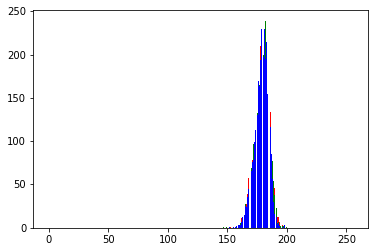

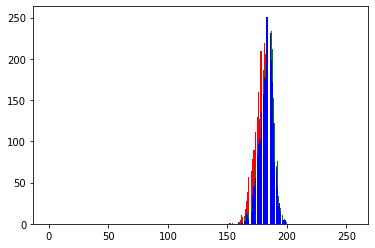

In [22]:
# 	cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) ->	hist
colors = ('r', 'g', 'b')

for i, color in enumerate(colorsn):
    hist = cv2.calcHist(indoor_RGB[:,:,0], [i], None, [256], [0, 256])
    plt.bar(range(256),hist.flatten(), color=color)

plt.show()

2. Plot the gray-scale histograms with different number of bins.

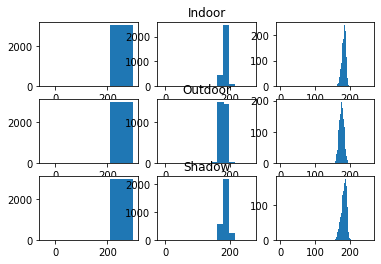

In [23]:
# Indoor
plt.subplot(3,3,1)
hist = cv2.calcHist(indoor, [0], None, [2], [0, 256])
plt.bar(np.linspace(0,256,2),hist.flatten(), width=90)

plt.subplot(3,3,2)
plt.title('Indoor')
hist = cv2.calcHist(indoor, [0], None, [16], [0, 256])
plt.bar(np.linspace(0,256,16),hist.flatten(), width=20)

plt.subplot(3,3,3)
hist_indoor = cv2.calcHist(indoor, [0], None, [256], [0, 256])
plt.bar(np.linspace(0,256,256),hist_indoor.flatten(), width=2)

# Outdoor
plt.subplot(3,3,4)
hist = cv2.calcHist(outdoor, [0], None, [2], [0, 256])
plt.bar(np.linspace(0,256,2),hist.flatten(), width=90)

plt.subplot(3,3,5)
plt.title('Outdoor')
hist = cv2.calcHist(outdoor, [0], None, [16], [0, 256])
plt.bar(np.linspace(0,256,16),hist.flatten(), width=20)

plt.subplot(3,3,6)
hist_outdoor = cv2.calcHist(outdoor, [0], None, [256], [0, 256])
plt.bar(np.linspace(0,256,256),hist_outdoor.flatten(), width=2)


# Shadow
plt.subplot(3,3,7)
hist = cv2.calcHist(shadow, [0], None, [2], [0, 256])
plt.bar(np.linspace(0,256,2),hist.flatten(), width=90)

plt.subplot(3,3,8)
plt.title('Shadow')
hist = cv2.calcHist(shadow, [0], None, [16], [0, 256])
plt.bar(np.linspace(0,256,16),hist.flatten(), width=20)

plt.subplot(3,3,9)
hist_shadow = cv2.calcHist(shadow, [0], None, [256], [0, 256])
plt.bar(np.linspace(0,256,256),hist_shadow.flatten(), width=2)


plt.show()


Normalize the histograms.

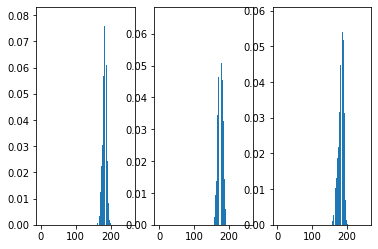

Indoor sum: 1.0
Outdoor sum: 1.0
Shadow sum: 1.0


In [24]:
def normalizeHist(hist):
    hist = hist/sum(hist)
    return hist

hist_norm_indoor = normalizeHist(hist_indoor)
hist_norm_outdoor = normalizeHist(hist_outdoor)
hist_norm_shadow = normalizeHist(hist_shadow)

plt.subplot(1,3,1)
plt.bar(np.linspace(0,256,256),hist_norm_indoor.flatten())

plt.subplot(1,3,2)
plt.bar(np.linspace(0,256,256),hist_norm_outdoor.flatten())

plt.subplot(1,3,3)
plt.bar(np.linspace(0,256,256),hist_norm_shadow.flatten())

plt.show()

print("Indoor sum:", np.sum(hist_norm_indoor))
print("Outdoor sum:", np.sum(hist_norm_outdoor))
print("Shadow sum:", np.sum(hist_norm_shadow))  

#### Matching Histograms
Correlation between the histograms of the two images is calculated using the `cv2.compareHist()` and we can use the next methods:

* Correlation
* Chi-square
* Intersection
* Bhattacharyya distance

##### Correlation
The function of comparison of this method is:

$$
d_{correl}(H_1,H_2) = \frac{\sum_i{\tilde{H}_1(i)\cdot \tilde{H}_2(i)}}{\sqrt{\sum_i{\tilde{H}_1^2(i)}\cdot \tilde{H}_2^2(i)}}
$$

Where $\tilde{H}_k(i) = H_k(i) - (\frac{1}{N} \sum_j{H_k(j)})$    

In [25]:
print("Correlation")
print("d(H_indoor, H_outdoor):", cv2.compareHist(hist_norm_indoor, hist_norm_outdoor, cv2.HISTCMP_CORREL))
print("d(H_indoor, H_shadow):", cv2.compareHist(hist_norm_indoor, hist_norm_shadow, cv2.HISTCMP_CORREL))
print("d(H_outdoor, H_shadow):", cv2.compareHist(hist_norm_outdoor, hist_norm_shadow, cv2.HISTCMP_CORREL))

Correlation
d(H_indoor, H_outdoor): 0.6831739064393753
d(H_indoor, H_shadow): 0.9328823887186118
d(H_outdoor, H_shadow): 0.6602523291997613


#### Chi-square
$$
d_{chi-square} = \sum_i{\frac{\left(H_1(i) - H_2(i)\right)^2}{H_1(i)+H_2(i)}}
$$

In [26]:
print("Chi-square")
print("d(H_indoor, H_outdoor):", cv2.compareHist(hist_norm_indoor, hist_norm_outdoor, cv2.HISTCMP_CHISQR))
print("d(H_indoor, H_shadow):", cv2.compareHist(hist_norm_indoor, hist_norm_shadow, cv2.HISTCMP_CHISQR))
print("d(H_outdoor, H_shadow):", cv2.compareHist(hist_norm_outdoor, hist_norm_shadow, cv2.HISTCMP_CHISQR ))

Chi-square
d(H_indoor, H_outdoor): 1.843402565328824
d(H_indoor, H_shadow): 0.3066985898571114
d(H_outdoor, H_shadow): 3.254179208463967


##### Intersection
$$
d_{intersection} = \sum_i{\min(H_1(i),H_2(i))}
$$

In [27]:
print("Intersection")
print("d(H_indoor, H_outdoor):", cv2.compareHist(hist_norm_indoor, hist_norm_outdoor, cv2.HISTCMP_INTERSECT))
print("d(H_indoor, H_shadow):", cv2.compareHist(hist_norm_indoor, hist_norm_shadow, cv2.HISTCMP_INTERSECT))
print("d(H_outdoor, H_shadow):", cv2.compareHist(hist_norm_outdoor, hist_norm_shadow, cv2.HISTCMP_INTERSECT))

Intersection
d(H_indoor, H_outdoor): 0.580666670575738
d(H_indoor, H_shadow): 0.8210000027320348
d(H_outdoor, H_shadow): 0.5926666688756086


##### Bhattacharyya distance
$$
d_{bhattacharyya} = \sqrt{1- \sum_i{\frac{\sqrt{H_1(i)-H_2(i)}}{\sqrt{\sum_i{H_1(i)}\cdot\sum_i{H_2(i)}}}}}
$$

In [28]:
print("Bhattacharyya")
print("d(H_indoor, H_outdoor):", cv2.compareHist(hist_norm_indoor, hist_norm_outdoor, cv2.HISTCMP_BHATTACHARYYA))
print("d(H_indoor, H_shadow):", cv2.compareHist(hist_norm_indoor, hist_norm_shadow, cv2.HISTCMP_BHATTACHARYYA))
print("d(H_outdoor, H_shadow):", cv2.compareHist(hist_norm_outdoor, hist_norm_shadow, cv2.HISTCMP_BHATTACHARYYA))

Bhattacharyya
d(H_indoor, H_outdoor): 0.36966260118964767
d(H_indoor, H_shadow): 0.17386423108507076
d(H_outdoor, H_shadow): 0.3676290112237396
